# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import itertools 
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

# EDA

In [2]:
df_merge = pd.read_csv('merge_data.csv')
df_merge = df_merge.drop('Unnamed: 0', 1)
df_merge.head()

,publisher,dagger,author,isbn,price,date,title,weeks_on_list,no_of_words_title,ratings_count,reviews_count,text_reviews_count,work_ratings_count,work_reviews_count,work_text_reviews_count,average_rating
0,Riverhead,0,Paula Hawkins,1594634025,0,2017-02-19,THE GIRL ON THE TRAIN,102,5,4832,8435,417,2082071,3313269,109917,3.92
1,Scribner,0,Anthony Doerr,1501173219,0,2017-05-07,ALL THE LIGHT WE CANNOT SEE,81,6,4375,10744,565,1005586,2142471,75056,4.33
2,Vintage,0,E L James,0525431888,0,2017-03-05,FIFTY SHADES DARKER,66,3,71,155,7,737540,1064380,29077,3.84
3,St. Martin's,0,Kristin Hannah,1466850604,0,2017-10-29,THE NIGHTINGALE,63,2,631,1480,150,680040,1319418,63407,4.58
4,Penguin Group,0,Kathryn Stockett,1440697663,0,2012-04-08,THE HELP,58,2,1491,1922,330,2141308,3031266,84485,4.47


In [3]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publisher                1281 non-null   object 
 1   dagger                   1281 non-null   int64  
 2   author                   1281 non-null   object 
 3   isbn                     1281 non-null   object 
 4   price                    1281 non-null   int64  
 5   date                     1281 non-null   object 
 6   title                    1281 non-null   object 
 7   weeks_on_list            1281 non-null   int64  
 8   no_of_words_title        1281 non-null   int64  
 9   ratings_count            1281 non-null   int64  
 10  reviews_count            1281 non-null   int64  
 11  text_reviews_count       1281 non-null   int64  
 12  work_ratings_count       1281 non-null   int64  
 13  work_reviews_count       1281 non-null   int64  
 14  work_text_reviews_count 

### Explore the relationships between variables

In [9]:
df_merge = df_merge.drop(columns=['dagger', 'price'], axis=1).copy()

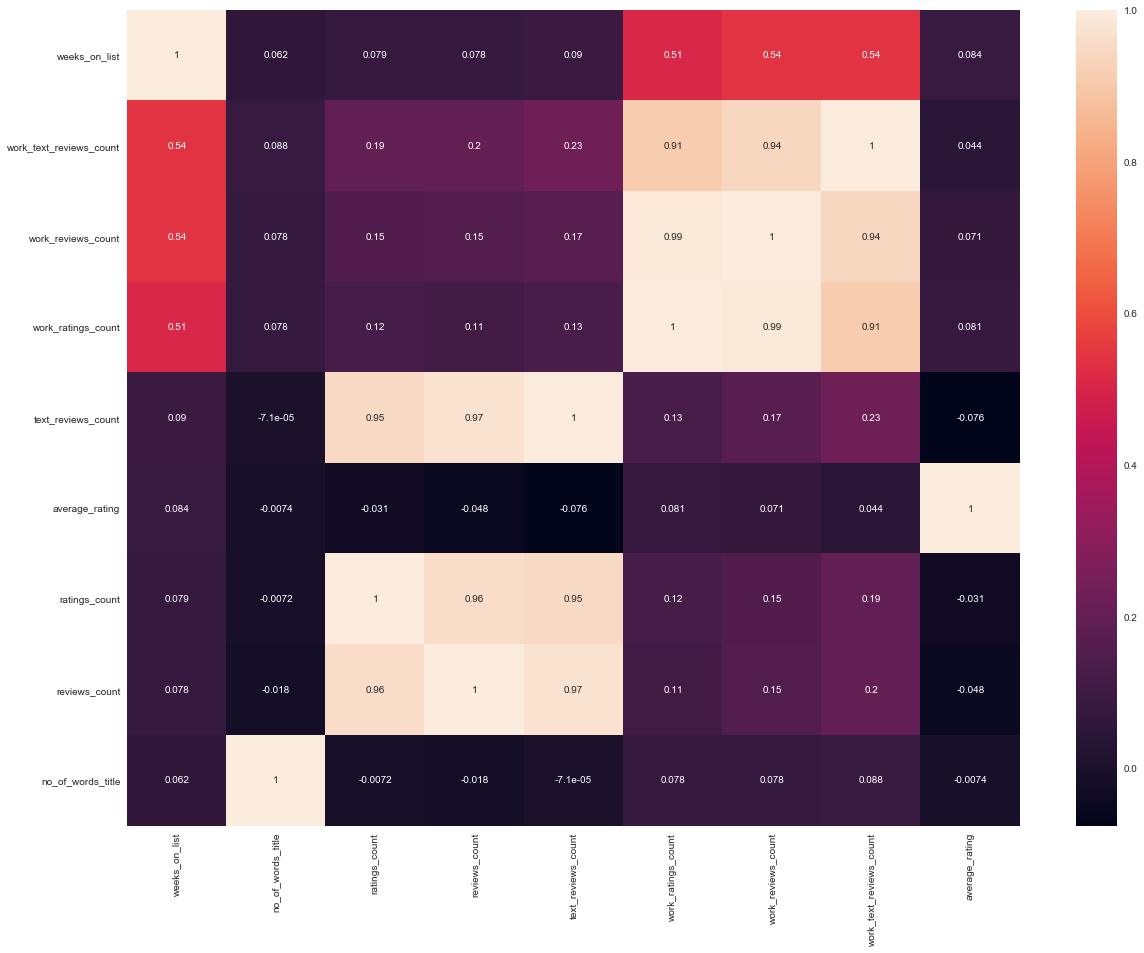

In [10]:
plt.subplots(figsize=(20,15))
sns.heatmap(df_merge.corr().sort_values('weeks_on_list', ascending=False), annot=True)
plt.show()

In [11]:
# Calculate correlation of each feature to 'weeks_on_list' and sort in descending order
corr = df_merge.corr()
corr = corr.stack().reset_index()
corr = corr.rename(columns = {'level_0':'Target', 'level_1':'Features', 0:'Correlation_Values'})
corr = corr.loc[corr['Target'] == 'weeks_on_list']
corr.sort_values(by = 'Correlation_Values', ascending = False)

,Target,Features,Correlation_Values
0,weeks_on_list,weeks_on_list,1.000000
7,weeks_on_list,work_text_reviews_count,0.538240
6,weeks_on_list,work_reviews_count,0.537973
5,weeks_on_list,work_ratings_count,0.509958
4,weeks_on_list,text_reviews_count,0.089506
8,weeks_on_list,average_rating,0.084384
2,weeks_on_list,ratings_count,0.078993
3,weeks_on_list,reviews_count,0.078310
1,weeks_on_list,no_of_words_title,0.061858


### Distribution of review and rating counts

(array([  3612.38783435,  10435.78707701,  30103.23195291,  77465.65022549,
        114793.6578471 , 114392.28142106,  74656.01524322,  42144.52473407,
         10435.78707701,   3612.38783435]),
 array([-3.08668035, -2.46213479, -1.83758923, -1.21304367, -0.58849811,
         0.03604745,  0.66059301,  1.28513857,  1.90968413,  2.53422968,
         3.15877524]),
 <a list of 10 Patch objects>)

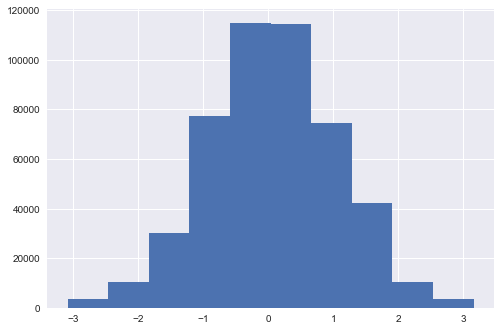

In [23]:
# Distribution of work_text_reviews_count
df = pd.DataFrame({'work_text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_text_reviews_count, weights=df.weeks_on_list)

(array([  7751.60500211,  25580.29650696,  79841.53152173, 176736.5940481 ,
        210843.65605738, 204642.37205569, 143404.69253903,  64338.32151751,
         13952.8890038 ,   3100.64200084]),
 array([-3.06749044, -2.43001999, -1.79254955, -1.1550791 , -0.51760866,
         0.11986179,  0.75733223,  1.39480268,  2.03227312,  2.66974357,
         3.30721401]),
 <a list of 10 Patch objects>)

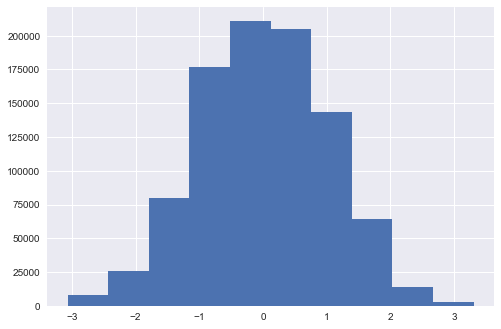

In [24]:
# Distribution of work_reviews_count
df = pd.DataFrame({'work_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_reviews_count, weights=df.weeks_on_list)

(array([  6852.01908739,  26646.7408954 ,  86792.24177358, 176629.82536378,
        225355.29442965, 197947.2180801 , 129427.02720622,  47202.79815756,
         12181.36726647,   4568.01272493]),
 array([-2.99115256, -2.36502946, -1.73890636, -1.11278326, -0.48666016,
         0.13946294,  0.76558604,  1.39170914,  2.01783224,  2.64395534,
         3.27007844]),
 <a list of 10 Patch objects>)

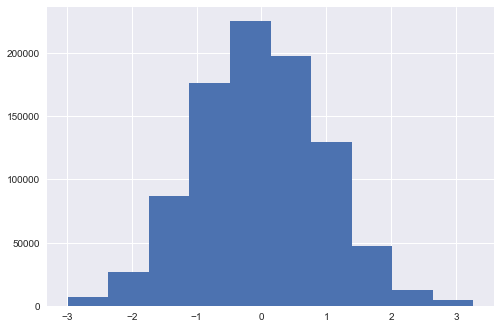

In [25]:
# Distribution of work_ratings_count
df = pd.DataFrame({'work_ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.work_ratings_count, weights=df.weeks_on_list)

(array([  7086.33668638,  34250.6273175 , 141726.73372757, 258651.28905281,
        343687.32928935, 318885.15088703, 206684.82001937,  68501.25463499,
         30707.45897431,   7086.33668638]),
 array([-3.15493313, -2.50443792, -1.85394272, -1.20344751, -0.5529523 ,
         0.09754291,  0.74803811,  1.39853332,  2.04902853,  2.69952373,
         3.35001894]),
 <a list of 10 Patch objects>)

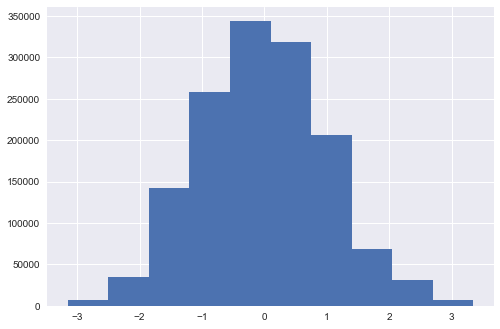

In [26]:
# Distribution of text_reviews_count
df = pd.DataFrame({'text_reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.text_reviews_count, weights=df.weeks_on_list)

(array([ 11992.01845804,  54425.31454034, 165120.86953764, 319172.18357554,
        282273.66524311, 191872.29532865,  64572.40708176,  12914.48141635,
          1844.92591662,   2767.38887493]),
 array([-3.01065679, -2.26308837, -1.51551996, -0.76795154, -0.02038312,
         0.72718529,  1.47475371,  2.22232212,  2.96989054,  3.71745895,
         4.46502737]),
 <a list of 10 Patch objects>)

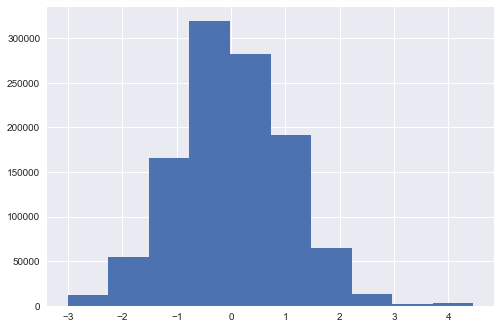

In [27]:
# Distribution of ratings_count
df = pd.DataFrame({'ratings_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.ratings_count, weights=df.weeks_on_list)

(array([  88.4418999 ,  442.20949949, 1562.47356488, 4156.76929524,
        7193.27452509, 8991.59315637, 6751.0650256 , 4746.38196123,
        1061.30279878,  383.24823289]),
 array([-3.50738481, -2.86324358, -2.21910235, -1.57496112, -0.93081989,
        -0.28667867,  0.35746256,  1.00160379,  1.64574502,  2.28988624,
         2.93402747]),
 <a list of 10 Patch objects>)

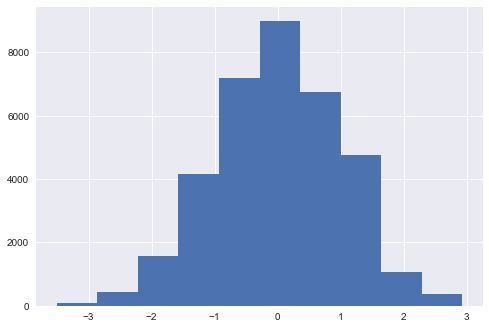

In [28]:
# Distribution of reviews_count
df = pd.DataFrame({'reviews_count': np.random.randn(1200),
                   'weeks_on_list': 1200 * np.random.rand()})
hist(df.reviews_count, weights=df.weeks_on_list)

### Scatter plots for average rating and number of words in title

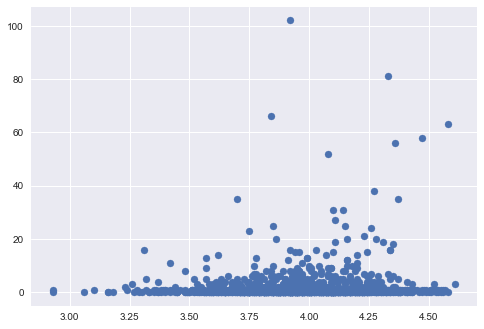

In [30]:
plt.scatter(df_merge['average_rating'], df_merge['weeks_on_list'])

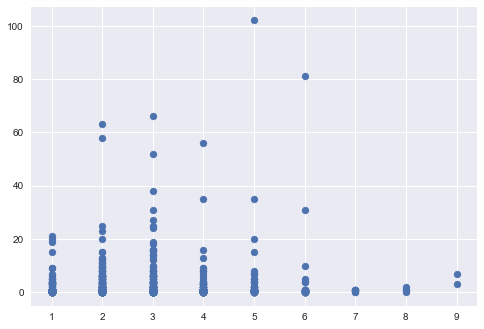

In [31]:
plt.scatter(df_merge['no_of_words_title'], df_merge['weeks_on_list'])